In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
Y_dict = {}
perturb_configs = [
    (0.0, 0.5),
    (0.2, 0.5),
    (0.5, 0.5),
    (0.8, 0.5)
]
n_trials = 3

In [82]:
for frac_perturb_samples_num, frac_perturb_dims_num in perturb_configs:

    frac_perturb_samples = str(frac_perturb_samples_num).replace('.', '')
    frac_perturb_dims = str(frac_perturb_dims_num).replace('.', '')

    Y = None
    for trial in range(n_trials):
        y = np.load('/home/yz685/saasbo/results/hartmann6_50/output_at_X/output_at_X_' \
            + frac_perturb_samples + '_' + frac_perturb_dims  + '_' + str(trial) + '.npy')
        y = np.expand_dims(np.minimum.accumulate(y), 0)
        if Y is None:
            Y = y 
        else:
            Y = np.vstack((Y, y))
    
    Y_dict[(frac_perturb_samples_num, frac_perturb_dims_num)] = Y

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 50 and the array at index 1 has size 30

Text(0, 0.5, 'Best objective achieved on ')

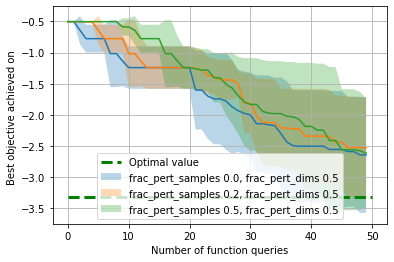

In [83]:
plt.plot([0, 50], [-3.322, -3.322], "--", c="g", lw=3, label="Optimal value")
plt.grid(True)

for frac_perturb_samples_num, frac_perturb_dims_num in Y_dict.keys():

    Y = Y_dict[(frac_perturb_samples_num, frac_perturb_dims_num)]

    plt.plot(np.mean(Y, axis = 0))
    plt.fill_between(
        np.arange(len(Y[0])),
        np.mean(Y, axis = 0) - 2 * np.std(Y, axis=0) / (n_trials ** 0.5),
        np.mean(Y, axis = 0) + 2 * np.std(Y, axis=0) / (n_trials ** 0.5),
        alpha = 0.3, label = 'frac_pert_samples {}, frac_pert_dims {}'.format(frac_perturb_samples_num, frac_perturb_dims_num)
    )

plt.legend()
plt.xlabel('Number of function queries') # seems liike I'm not including the initial ones
plt.ylabel('Best objective achieved on ')
plt.title('Hartmann6 (d=6, D=50)')